# Enhancing NHL Salary Evaluation through Dimensionality Reduction  
Raphaël Fontaine  
McGill University  
Montreal, Canada  
raphael.fontaine@mail.mcgill.ca  

# Case Studies

In [1]:
import common
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original_df = common.load_dataset(preprocess=False)

df = common.preprocess_dataset(original_df)

# Split features and label
X_data, y_data = common.split_dataset(df)

## Brendan Gallagher
term: 6yrs   
cap hit: $3.75M  
seasons: 2015-2021

In [3]:
player_seasons = original_df[(original_df["name"] == "Brendan Gallagher") & 
                       (original_df["season"] >= 2015) & 
                       (original_df["season"] <= 2020)]

# Separate player seasons from X_data by using the indexes from player_seasons
X_player = X_data.loc[player_seasons.index].to_numpy()
y_player = y_data.loc[player_seasons.index].to_numpy()

X_train = X_data.drop(player_seasons.index).to_numpy()
y_train = y_data.drop(player_seasons.index).to_numpy()

# Standardize the data
X_train, X_player = common.standard_scaler(X_train, X_player)

# Train the models
results_df, predictions = common.train_and_evaluate(X_train, y_train, X_player, y_player)
results_df

,R2,MAE,Top-100 MAE,Top-50 MAE,SMAPE,Train time (sec)
Model,,,,,,
Linear Regression,-23.0005,"931,713","931,713","931,713",0.2494,0.50
Random Forest,-35.4415,"1,090,176","1,090,176","1,090,176",0.2297,8.12
Support Vector,-10.7066,"672,323","672,323","672,323",0.1559,6.61
K-Nearest Neighbors,-22.4009,"836,157","836,157","836,157",0.1797,0.03


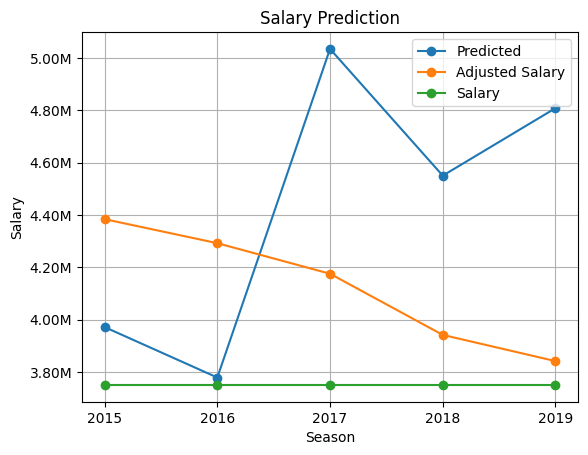

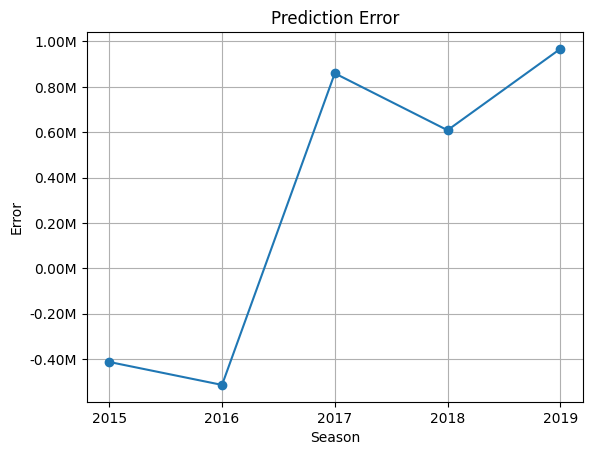

In [4]:
# Use SVM prediction as the base model
salary_evaluation = predictions[2]
seasons = player_seasons["season"].astype(str)
adjusted_salary = player_seasons["adjustedSalary"]
salary = player_seasons["salary"]

# Plot the results
plt.plot(seasons, salary_evaluation, label="Predicted", marker="o")
plt.plot(seasons, adjusted_salary, label="Adjusted Salary", marker="o")
plt.plot(seasons, salary, label="Salary", marker="o")
plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
plt.xlabel("Season")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.legend()
plt.grid()
plt.show()

# Plot the error by season
error = salary_evaluation - adjusted_salary
plt.plot(seasons, error, marker="o")
plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
plt.xlabel("Season")
plt.ylabel("Error")
plt.title("Prediction Error")
plt.grid()
plt.show()

## Zach Hyman
term: 6yrs  
cap hit: $3.75M  
seasons: 2017-2020  
  
term: 7yrs   
cap hit: $5.50M  
seasons: 2021-2028

### Baseline

In [5]:
player_seasons = original_df[(original_df["name"] == "Zach Hyman") & 
                       (original_df["season"] >= 2017) & 
                       (original_df["season"] <= 2023)]

# Separate player seasons from X_data by using the indexes from player_seasons
X_player = X_data.loc[player_seasons.index].to_numpy()
y_player = y_data.loc[player_seasons.index].to_numpy()

X_train = X_data.drop(player_seasons.index).to_numpy()
y_train = y_data.drop(player_seasons.index).to_numpy()

# Standardize the data
X_train, X_player = common.standard_scaler(X_train, X_player)

# Train the models
results_df, predictions = common.train_and_evaluate(X_train, y_train, X_player, y_player)
results_df

,R2,MAE,Top-100 MAE,Top-50 MAE,SMAPE,Train time (sec)
Model,,,,,,
Linear Regression,0.0976,"1,276,427","1,276,427","1,276,427",0.3206,1.29
Random Forest,-0.6810,"1,813,310","1,813,310","1,813,310",0.4139,7.99
Support Vector,0.5366,"945,722","945,722","945,722",0.2737,7.33
K-Nearest Neighbors,-0.2359,"1,458,428","1,458,428","1,458,428",0.3331,0.03


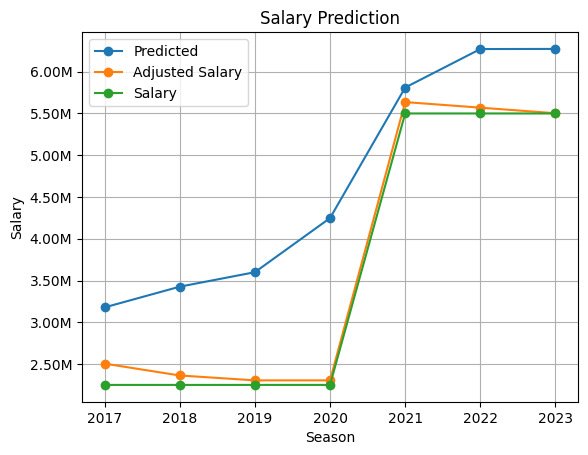

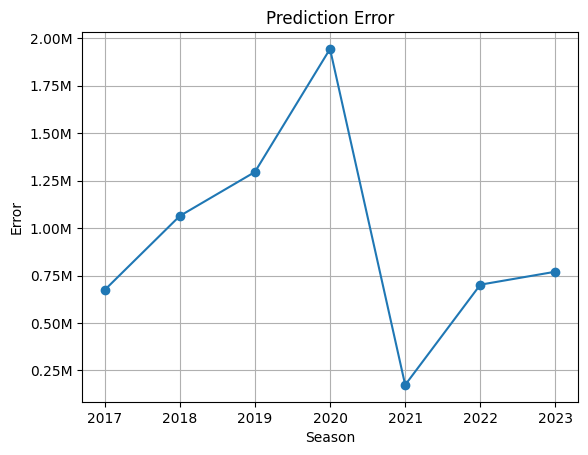

In [6]:
# Use SVM prediction as the base model
salary_evaluation = predictions[2]
seasons = player_seasons["season"].astype(str)
adjusted_salary = player_seasons["adjustedSalary"]
salary = player_seasons["salary"]

# Plot the results
plt.plot(seasons, salary_evaluation, label="Predicted", marker="o")
plt.plot(seasons, adjusted_salary, label="Adjusted Salary", marker="o")
plt.plot(seasons, salary, label="Salary", marker="o")
plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
plt.xlabel("Season")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.legend()
plt.grid()
plt.show()

# Plot the error by season
error = salary_evaluation - adjusted_salary
plt.plot(seasons, error, marker="o")
plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
plt.xlabel("Season")
plt.ylabel("Error")
plt.title("Prediction Error")
plt.grid()
plt.show()

### PCA

In [7]:
X = X_train.copy()
n_samples, n_features = X.shape

# Center the data (subtract the mean of each feature)
X_centered = X - np.mean(X, axis=0)

# Singular Value Decomposition
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Compute explained variance
explained_variance = (S**2) / (n_samples-1)
total_explained_variance = np.sum(explained_variance)
explained_variance_ratio = explained_variance / total_explained_variance

# Compute cumulative explained variance
cumsum = np.cumsum(explained_variance_ratio)
x_range = range(0, len(cumsum))

n_components = 3

# Transform data into principal component space
X_train_pca = np.dot(X_centered, Vt.T)
X_train_pca = X_train_pca[:, :n_components]

# Adjust the features for playering
X_player_centered = X_player - np.mean(X, axis=0)
X_player_pca = np.dot(X_player_centered, Vt.T)
X_player_pca = X_player_pca[:, :n_components]

# Train the models
results_pca_df, predictions_pca = common.train_and_evaluate(X_train_pca, y_train, X_player_pca, y_player)
results_pca_df

,R2,MAE,Top-100 MAE,Top-50 MAE,SMAPE,Train time (sec)
Model,,,,,,
Linear Regression,-0.1777,"1,534,336","1,534,336","1,534,336",0.3691,0.00
Random Forest,-1.1858,"1,828,733","1,828,733","1,828,733",0.3788,0.82
Support Vector,0.0191,"1,390,071","1,390,071","1,390,071",0.3322,0.57
K-Nearest Neighbors,-0.8451,"1,648,480","1,648,480","1,648,480",0.3330,0.00


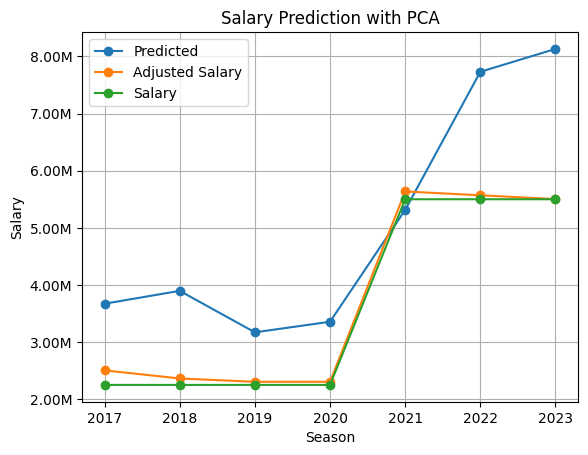

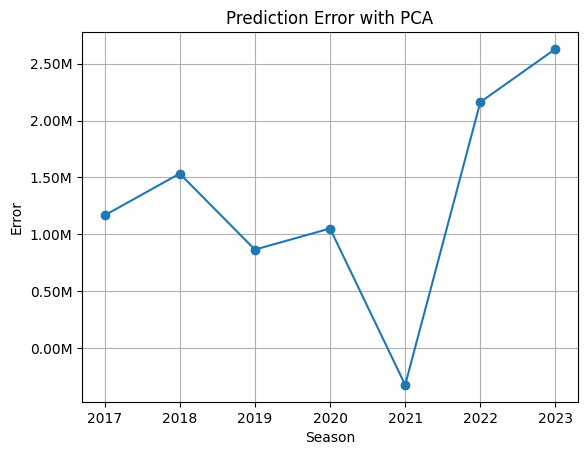

In [8]:
# Use SVM prediction as the base model
salary_evaluation = predictions_pca[2]
seasons = player_seasons["season"].astype(str)
adjusted_salary = player_seasons["adjustedSalary"]
salary = player_seasons["salary"]

# Plot the results
plt.plot(seasons, salary_evaluation, label="Predicted", marker="o")
plt.plot(seasons, adjusted_salary, label="Adjusted Salary", marker="o")
plt.plot(seasons, salary, label="Salary", marker="o")
plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
plt.xlabel("Season")
plt.ylabel("Salary")
plt.title("Salary Prediction with PCA")
plt.legend()
plt.grid()
plt.show()

# Plot the error by season
error = salary_evaluation - adjusted_salary
plt.plot(seasons, error, marker="o")
plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
plt.xlabel("Season")
plt.ylabel("Error")
plt.title("Prediction Error with PCA")
plt.grid()
plt.show()

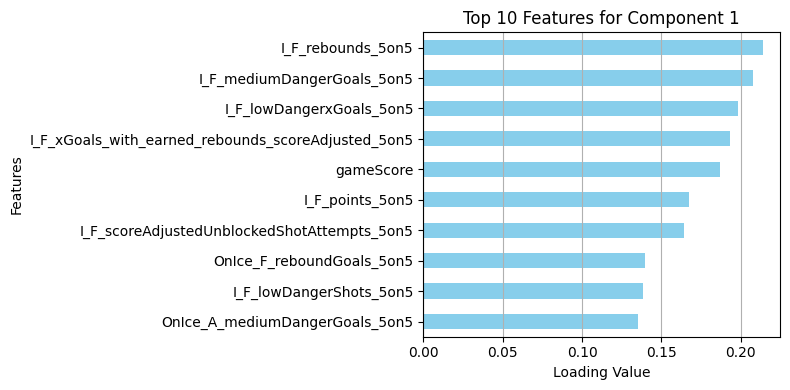

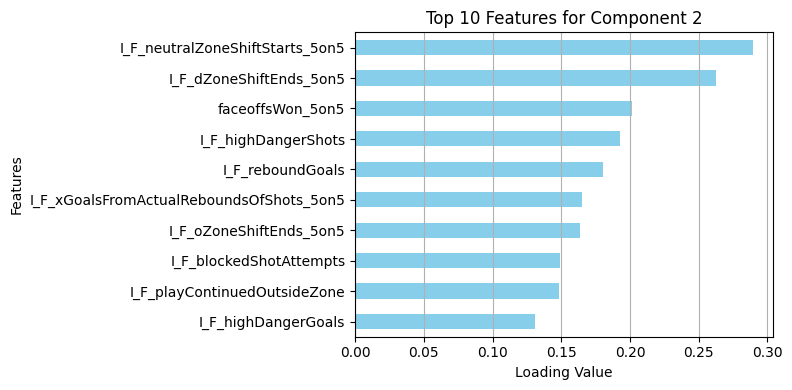

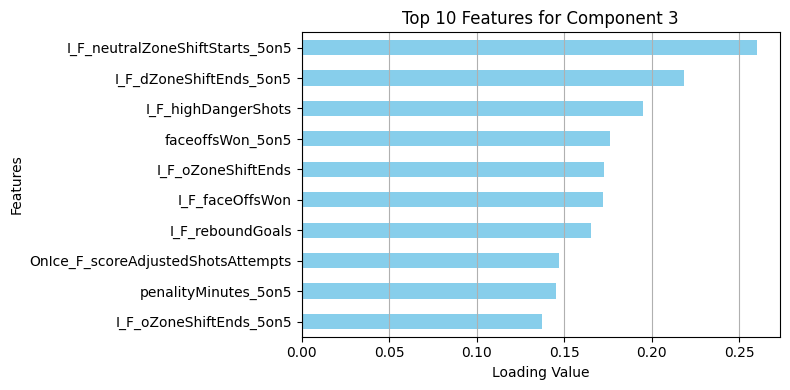

In [9]:
n_top_features = 10

loadings_df = pd.DataFrame(Vt, index=X_data.columns)

for comp in range(n_components):
    plt.figure(figsize=(8, 4))
    # Sort features by absolute loading values for the current component
    top_features = loadings_df.iloc[:, comp].abs().nlargest(n_top_features)
    
    # Plot
    top_features.sort_values().plot(kind='barh', color='skyblue')
    plt.title(f"Top {n_top_features} Features for Component {comp + 1}")
    plt.xlabel("Loading Value")
    plt.ylabel("Features")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

In [10]:
def density_plot(df, c1=1, c2=2):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        df[f"PC{c1}"], df[f"PC{c2}"], 
        c=df["Salary"], cmap="viridis", edgecolor="k", s=300
    )
    colorbar = plt.colorbar(scatter, label="Salary")
    colorbar.ax.yaxis.set_major_formatter(common.get_mformatter(2))
    plt.xlabel(f"Principal Component {c1}")
    plt.ylabel(f"Principal Component {c2}")
    plt.title("Scatter Plot of Pincipal Components (Colored by Adjusted Salary)")
    plt.grid()
    plt.show()

def plot_component(df, c=1):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[f"PC{c}"], df["Salary"], s=100)
    plt.xlabel(f"Principal Component {c}")
    plt.ylabel("Salary")
    plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
    plt.title(f"Principal Component {c} vs Salary")
    plt.grid()
    plt.show()

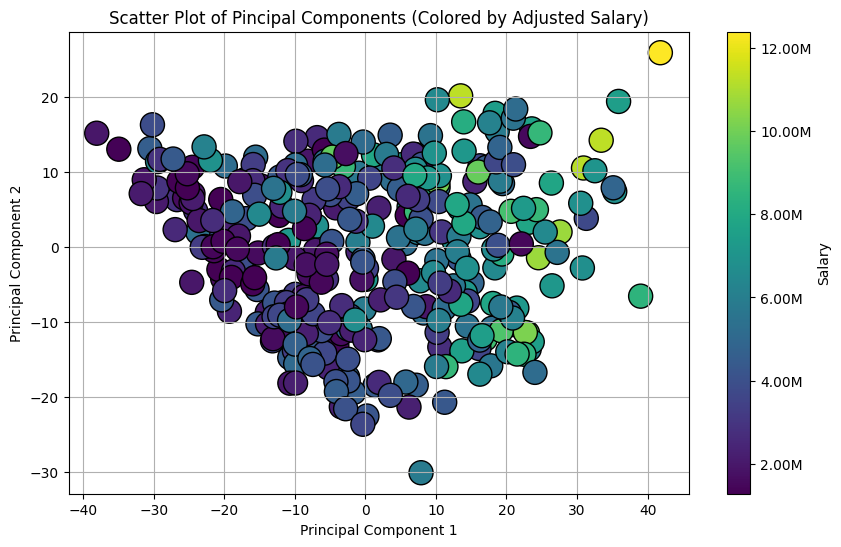

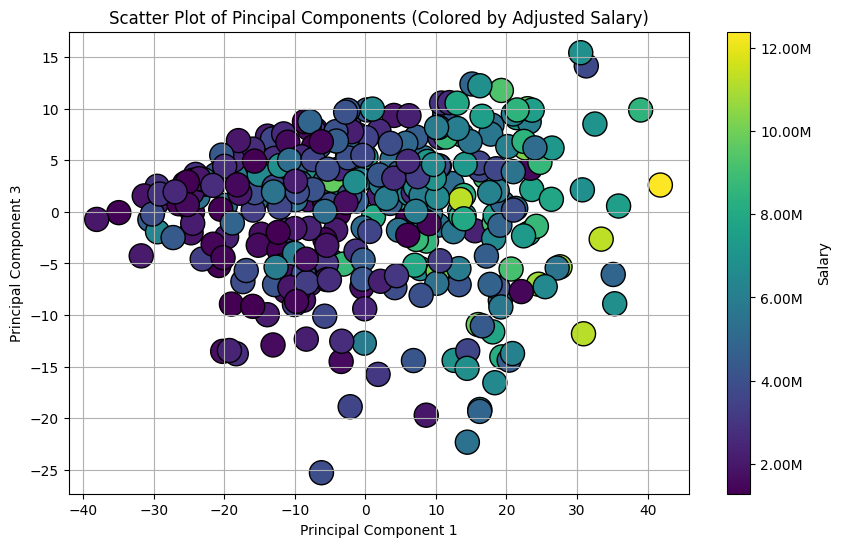

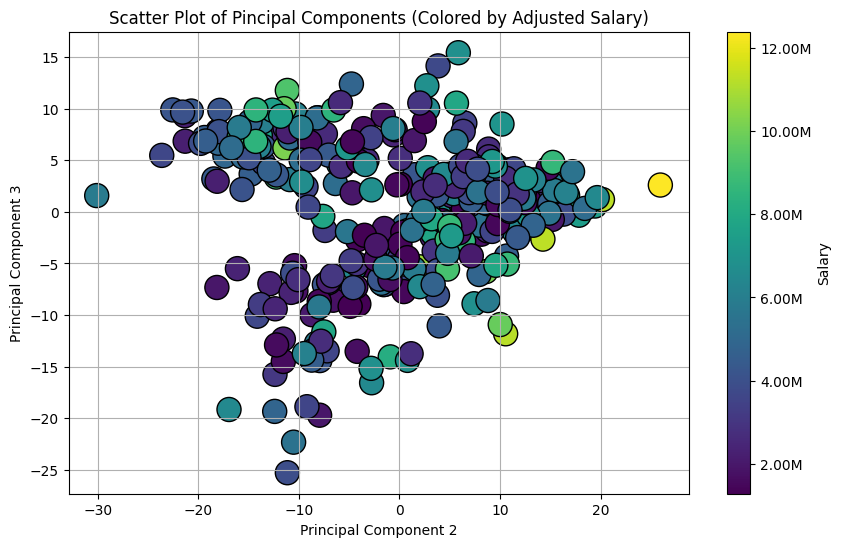

In [11]:
train_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(n_components)])
train_df["Season"] = X_data["season"].astype(str)  # Add season info
train_df["Salary"] = y_data.drop(player_seasons.index)  # Add salary info

# Select only 2013 season
train_df = train_df[train_df["Season"] == "2013"]

density_plot(train_df, c1=1, c2=2)
density_plot(train_df, c1=1, c2=3)
density_plot(train_df, c1=2, c2=3)

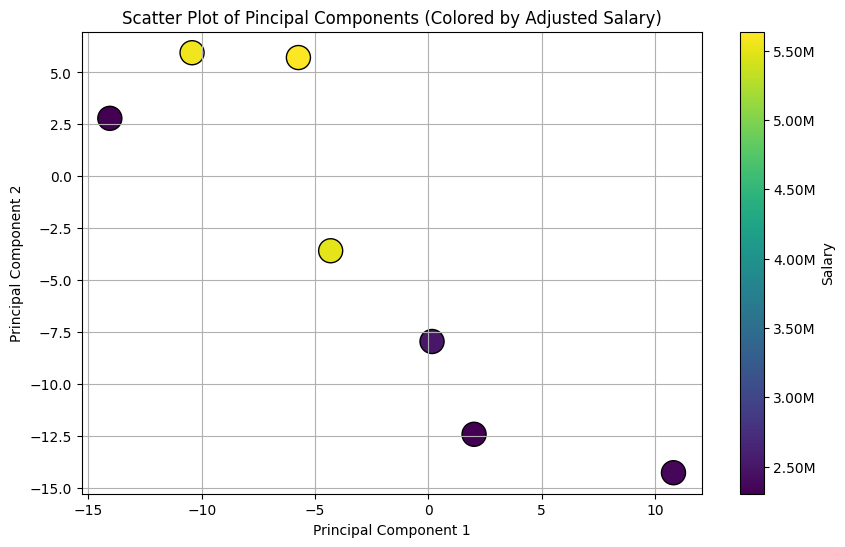

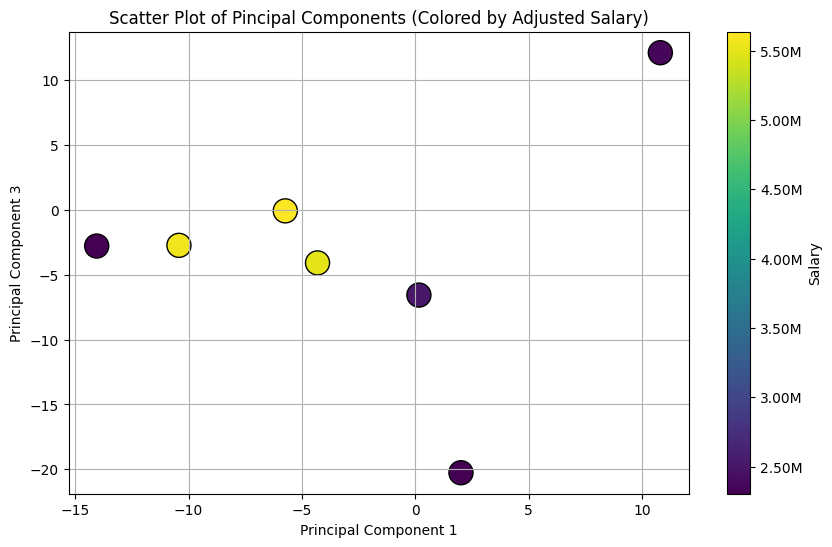

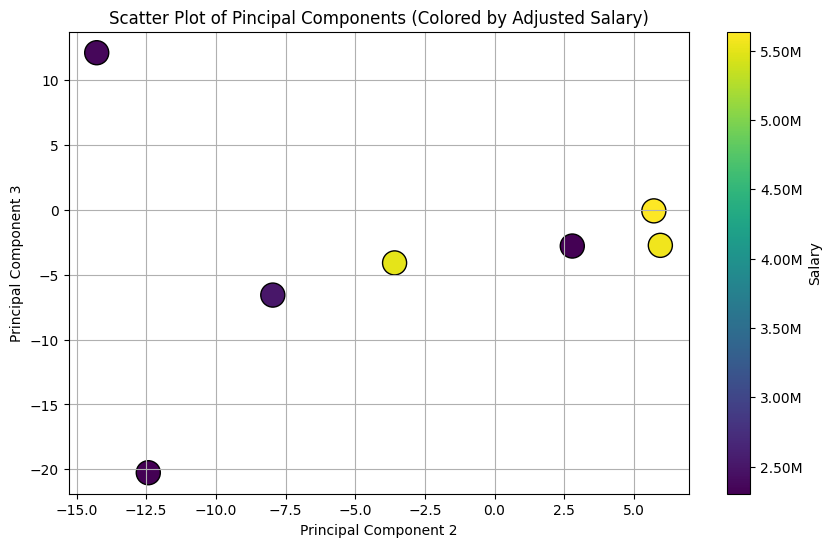

In [12]:
player_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(n_components)])
player_df["Season"] = player_seasons["season"].astype(str)
player_df["Salary"] = player_seasons["adjustedSalary"]

density_plot(player_df, c1=1, c2=2)
density_plot(player_df, c1=1, c2=3)
density_plot(player_df, c1=2, c2=3)

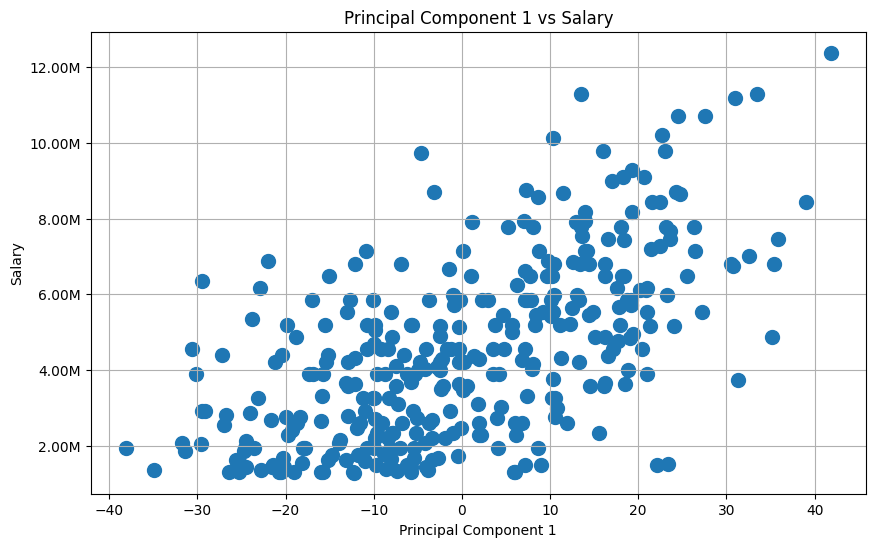

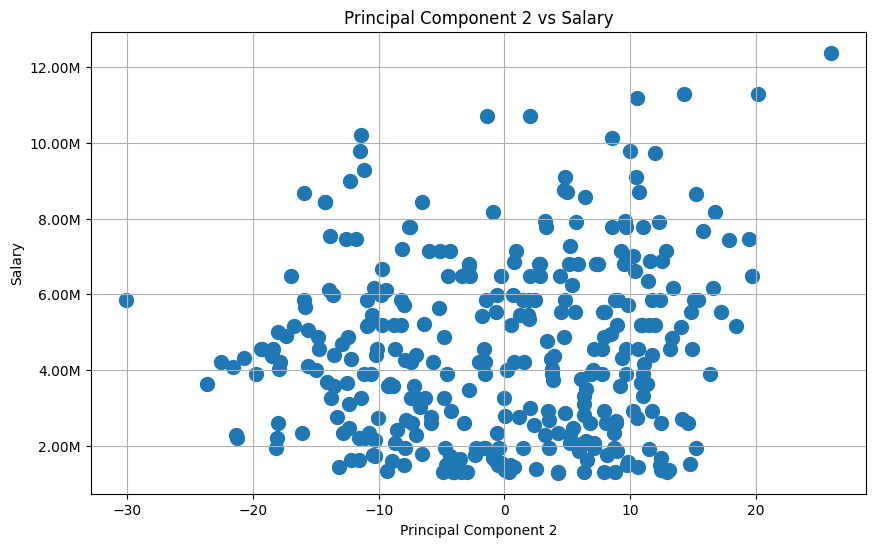

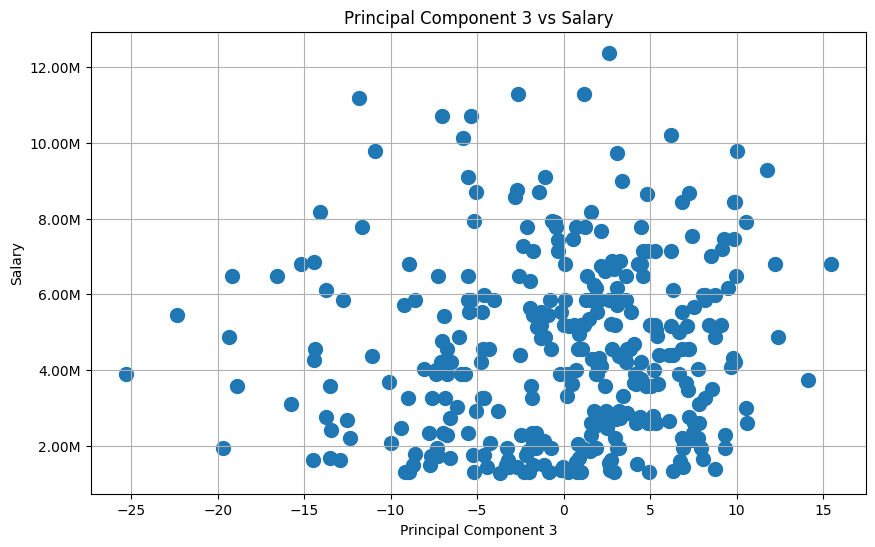

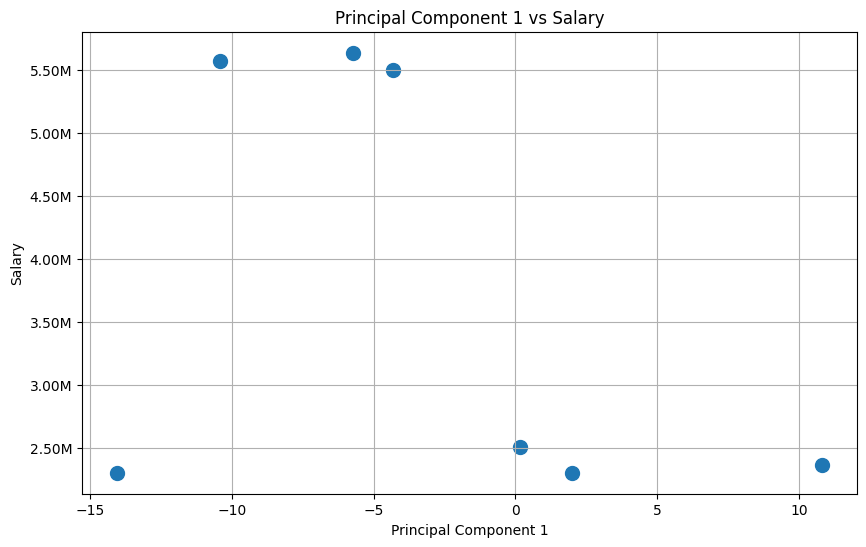

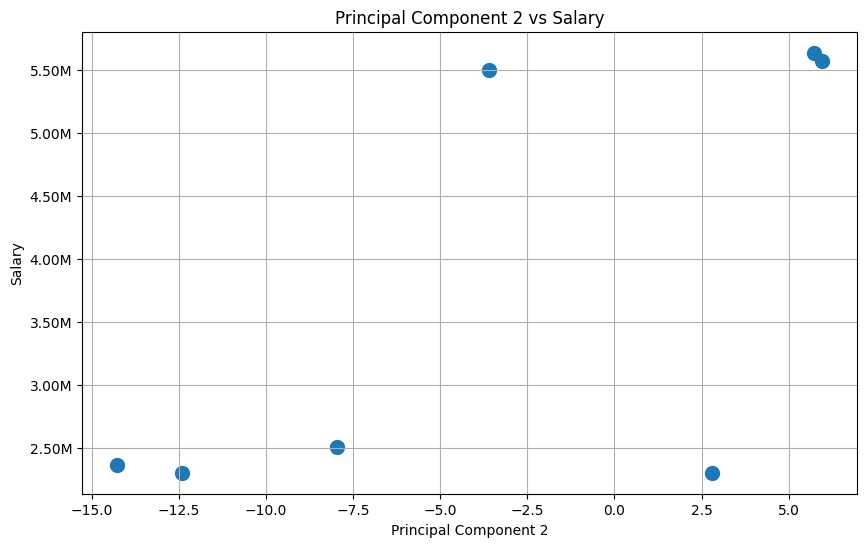

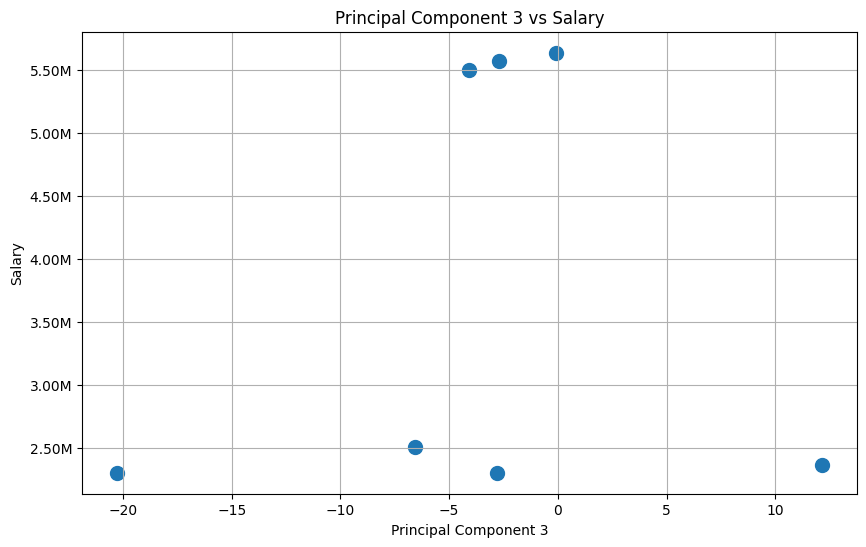

In [13]:
plot_component(train_df, c=1)
plot_component(train_df, c=2)
plot_component(train_df, c=3)

plot_component(player_df, c=1)
plot_component(player_df, c=2)
plot_component(player_df, c=3)

### PLS

In [14]:
def PLS(n_components):
    X = X_train.astype(np.float64)
    n_samples, n_features = X.shape

    # Reshape y to column vector of floats
    y = y_train.reshape(-1, 1).astype(np.float64)

    # Initialize matrices full of zeros
    T = np.zeros((n_samples, n_components))     # Components
    W = np.zeros((n_features, n_components))    # Weights
    P = np.zeros((n_features, n_components))    # Loadings for X
    Q = np.zeros(n_components)                  # Loadings for y

    for i in range(n_components):
        # Compute weights w that maximize covariance between X and y
        w = X.T @ y
        w /= np.linalg.norm(w)  # Normalize to unit length
        
        # Project X onto w to find t
        t = X @ w
        
        tk = (t.T @ t)

        # Compute loadings p
        p = (X.T @ t) / tk
        
        # Compute loadings q
        q = (y.T @ t) / tk
        q = q.item()  # Convert to scalar
        
        # Deflate X and y
        X -= t @ p.T
        y -= q * t
        
        # Store results
        T[:, i] = t.ravel()
        P[:, i] = p.ravel()
        W[:, i] = w.ravel()
        Q[i] = q
    
    return T, W, P, Q

In [15]:
X = X_train.copy()
n_samples, n_features = X.shape

n_components = 3

# Perform PLS and apply to the data
T, W, P, Q = PLS(n_components)

X_train_pls = X_train @ W
X_player_pls = X_player @ W

# Train the models
results_pls_df, predictions_pls = common.train_and_evaluate(X_train_pls, y_train, X_player_pls, y_player)
results_pls_df

,R2,MAE,Top-100 MAE,Top-50 MAE,SMAPE,Train time (sec)
Model,,,,,,
Linear Regression,0.4663,"1,056,753","1,056,753","1,056,753",0.2781,0.00
Random Forest,-0.3950,"1,622,787","1,622,787","1,622,787",0.3589,0.71
Support Vector,0.5480,"979,214","979,214","979,214",0.2601,0.56
K-Nearest Neighbors,0.1857,"1,280,001","1,280,001","1,280,001",0.3098,0.00


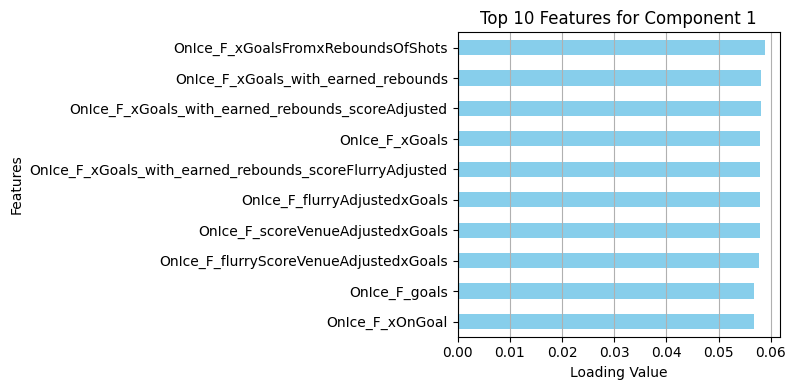

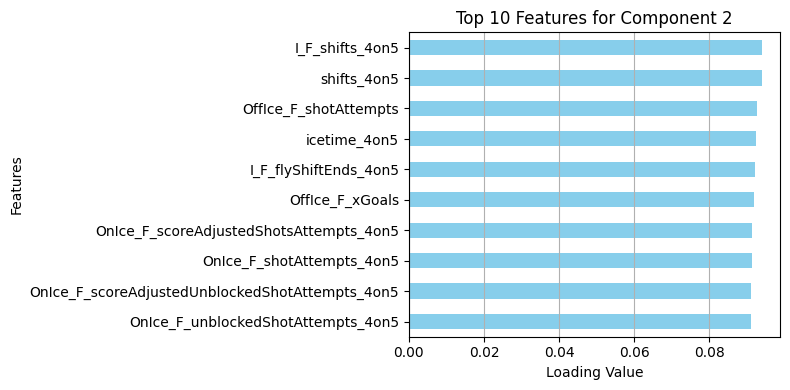

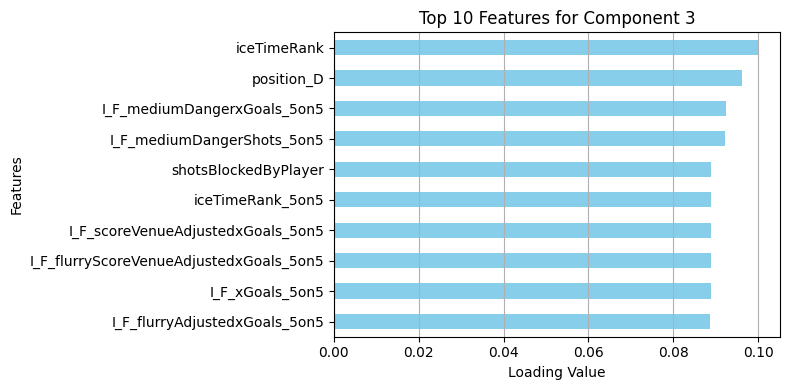

In [16]:
n_top_features = 10

loadings_df = pd.DataFrame(P, index=X_data.columns)

for comp in range(n_components):
    plt.figure(figsize=(8, 4))
    # Sort features by absolute loading values for the current component
    top_features = loadings_df.iloc[:, comp].abs().nlargest(n_top_features)
    
    # Plot
    top_features.sort_values().plot(kind='barh', color='skyblue')
    plt.title(f"Top {n_top_features} Features for Component {comp + 1}")
    plt.xlabel("Loading Value")
    plt.ylabel("Features")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

In [17]:
def density_plot(df, c1=1, c2=2):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        df[f"PC{c1}"], df[f"PC{c2}"], 
        c=df["Salary"], cmap="viridis", edgecolor="k", s=300
    )
    colorbar = plt.colorbar(scatter, label="Salary")
    colorbar.ax.yaxis.set_major_formatter(common.get_mformatter(2))
    plt.xlabel(f"Component {c1}")
    plt.ylabel(f"Component {c2}")
    plt.title("Scatter Plot of Components (Colored by Adjusted Salary)")
    plt.grid()
    plt.show()

def plot_component(df, c=1):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[f"PC{c}"], df["Salary"], s=100)
    plt.xlabel(f"Component {c}")
    plt.ylabel("Salary")
    plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
    plt.title(f"Component {c} vs Salary")
    plt.grid()
    plt.show()

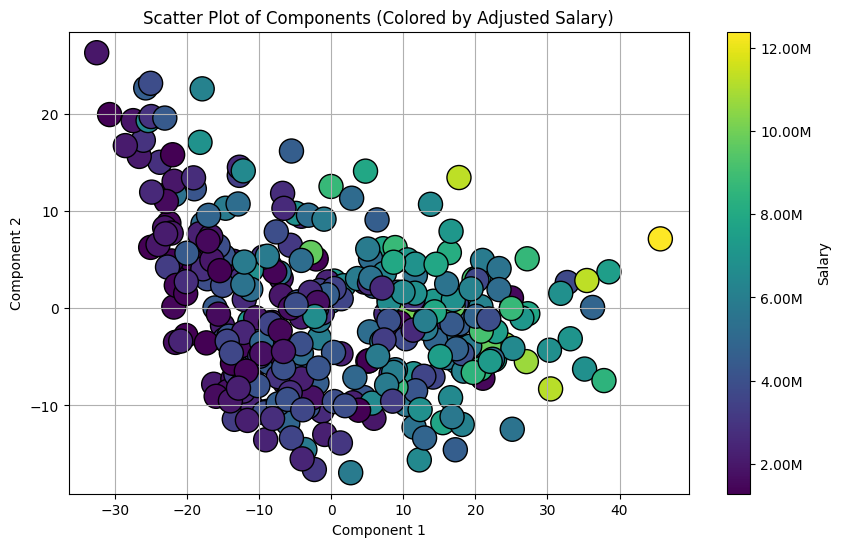

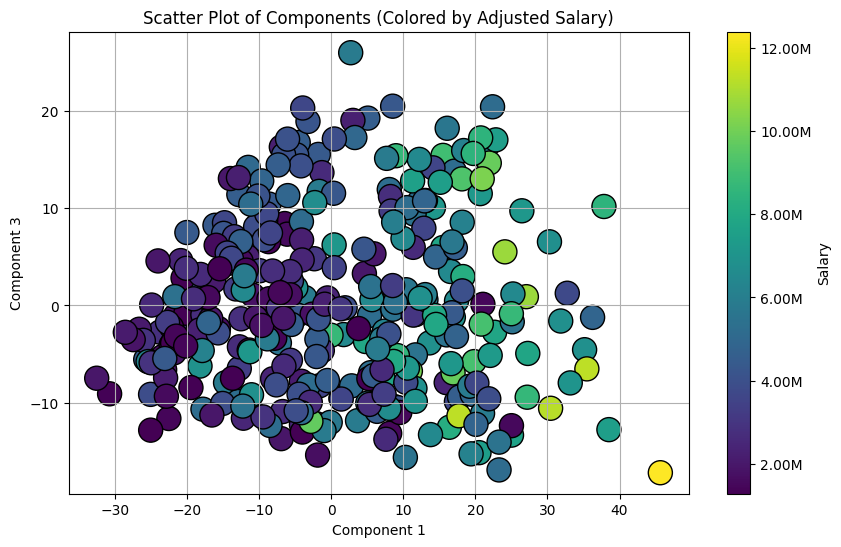

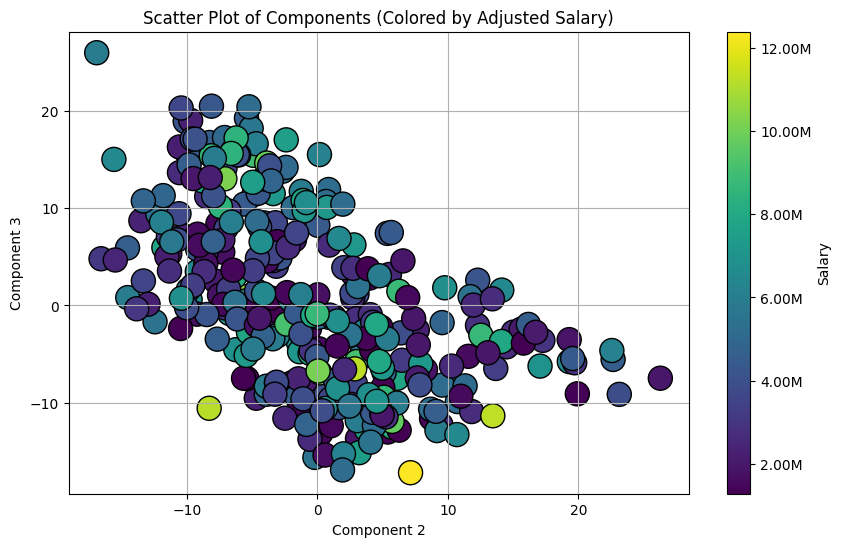

In [18]:
train_df = pd.DataFrame(X_train_pls, columns=[f"PC{i+1}" for i in range(n_components)])
train_df["Season"] = X_data["season"].astype(str)  # Add season info
train_df["Salary"] = y_data.drop(player_seasons.index)  # Add salary info

# Select only 2023 season
train_df = train_df[train_df["Season"] == "2013"]

density_plot(train_df, c1=1, c2=2)
density_plot(train_df, c1=1, c2=3)
density_plot(train_df, c1=2, c2=3)

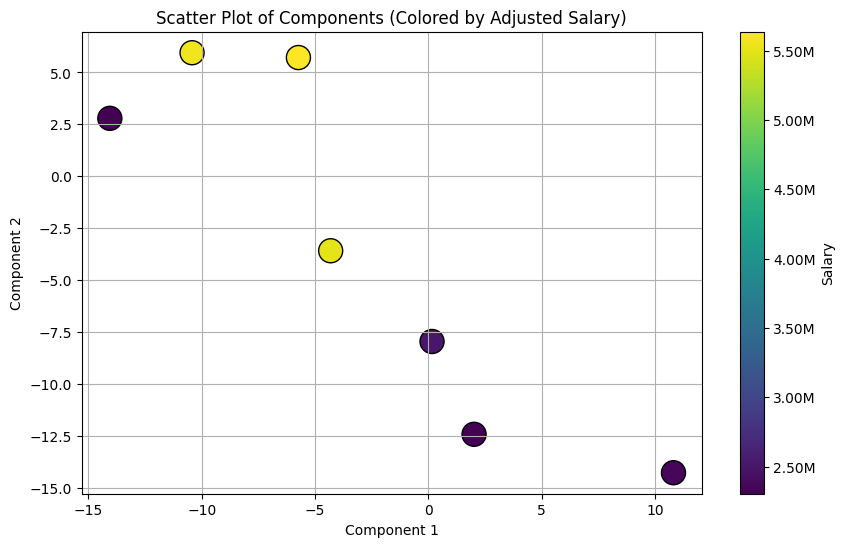

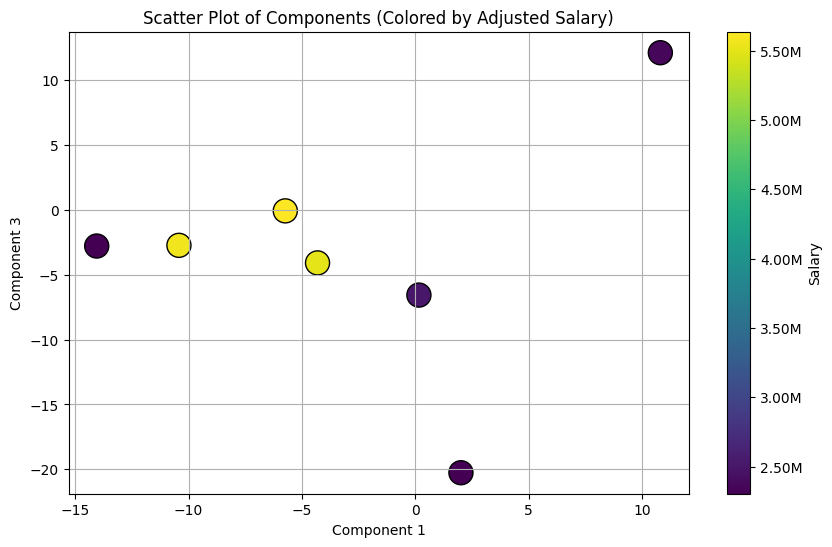

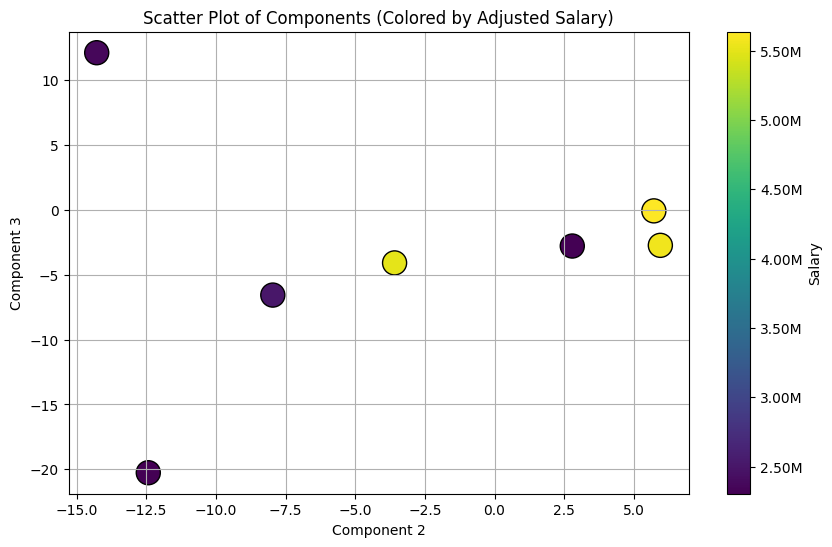

In [19]:
player_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(n_components)])
player_df["Season"] = player_seasons["season"].astype(str)
player_df["Salary"] = player_seasons["adjustedSalary"]

density_plot(player_df, c1=1, c2=2)
density_plot(player_df, c1=1, c2=3)
density_plot(player_df, c1=2, c2=3)

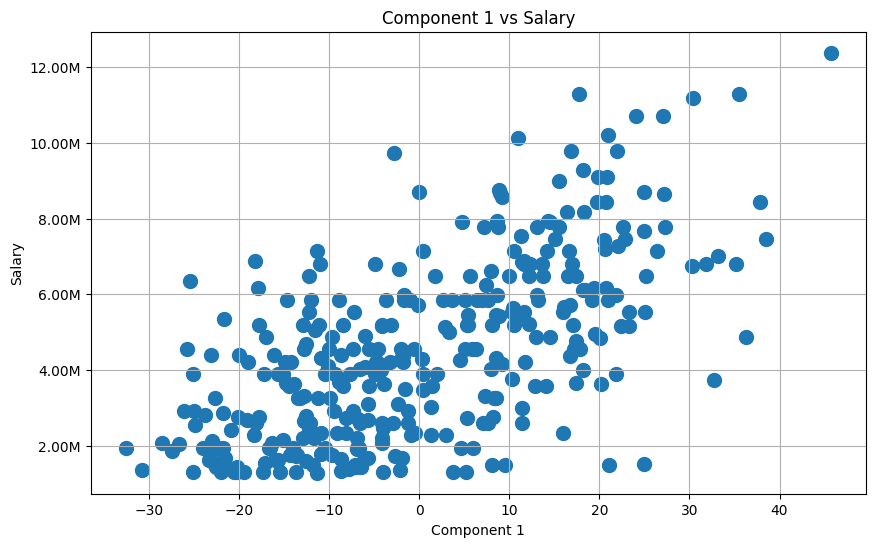

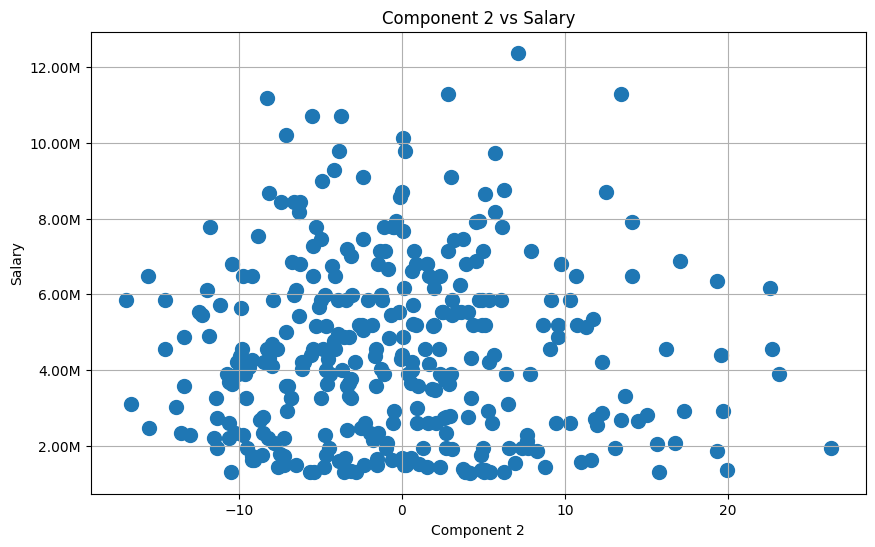

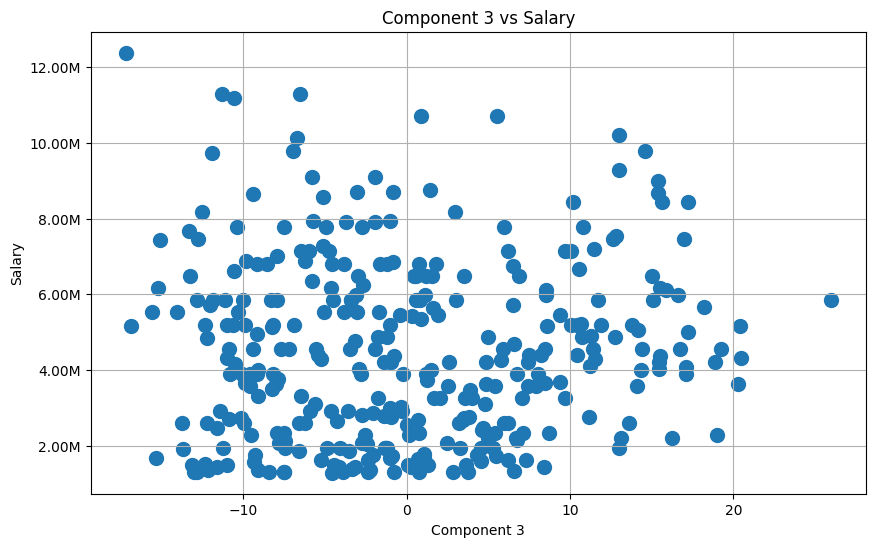

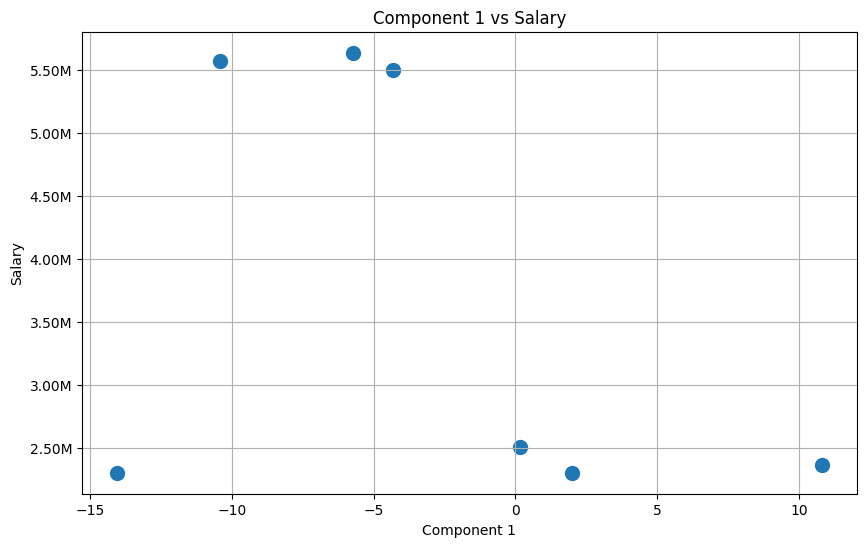

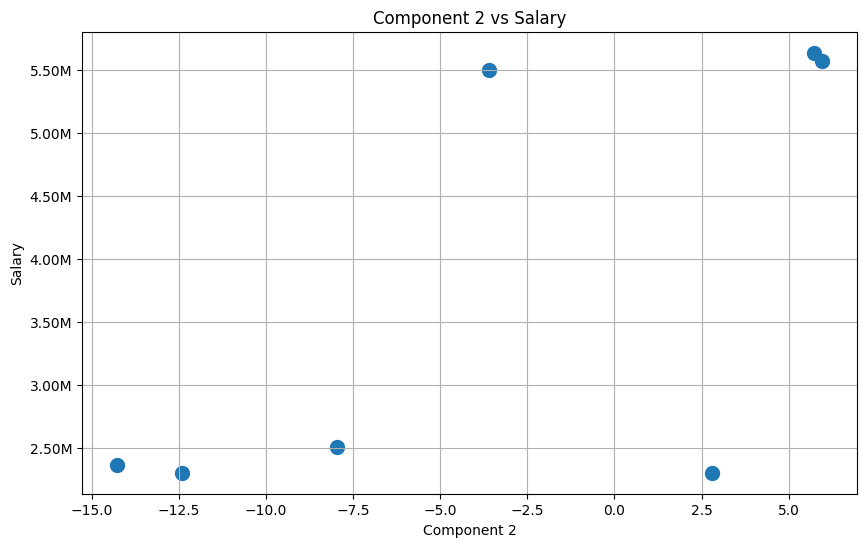

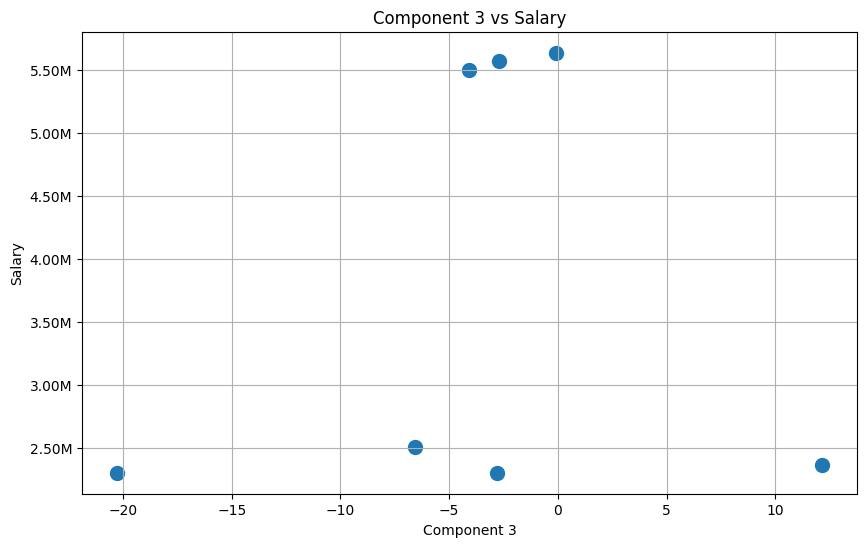

In [20]:
plot_component(train_df, c=1)
plot_component(train_df, c=2)
plot_component(train_df, c=3)

plot_component(player_df, c=1)
plot_component(player_df, c=2)
plot_component(player_df, c=3)

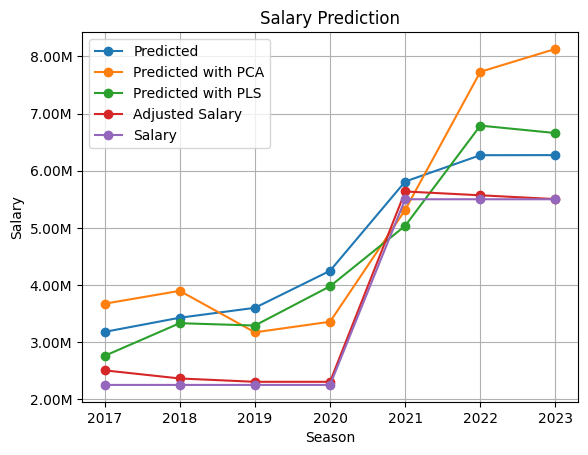

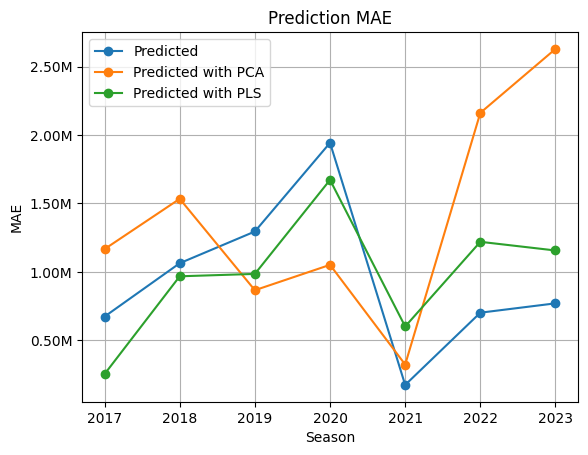

In [21]:
# Use SVM prediction as the base model
salary_evaluation = predictions[2]
salary_evaluation_PCA = predictions_pca[2]
salary_evaluation_PLS = predictions_pls[2]
seasons = player_seasons["season"].astype(str)
adjusted_salary = player_seasons["adjustedSalary"]
salary = player_seasons["salary"]

# Plot the results
plt.plot(seasons, salary_evaluation, label="Predicted", marker="o")
plt.plot(seasons, salary_evaluation_PCA, label="Predicted with PCA", marker="o")
plt.plot(seasons, salary_evaluation_PLS, label="Predicted with PLS", marker="o")
plt.plot(seasons, adjusted_salary, label="Adjusted Salary", marker="o")
plt.plot(seasons, salary, label="Salary", marker="o")
plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
plt.xlabel("Season")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.legend()
plt.grid()
plt.show()

# Plot the error by season
error = salary_evaluation - adjusted_salary
error_PCA = salary_evaluation_PCA - adjusted_salary
error_PLS = salary_evaluation_PLS - adjusted_salary
plt.plot(seasons, error.abs(), label="Predicted", marker="o")
plt.plot(seasons, error_PCA.abs(), label="Predicted with PCA", marker="o")
plt.plot(seasons, error_PLS.abs(), label="Predicted with PLS", marker="o")
plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
plt.xlabel("Season")
plt.ylabel("MAE")
plt.title("Prediction MAE")
plt.legend()
plt.grid()
plt.show()

## Sidney Crosby
term: 12yrs   
cap hit: $8.70M  
seasons: 2013-2024

In [22]:
player_seasons = original_df[(original_df["name"] == "Sidney Crosby")]

# Separate player seasons from X_data by using the indexes from player_seasons
X_player = X_data.loc[player_seasons.index].to_numpy()
y_player = y_data.loc[player_seasons.index].to_numpy()

X_train = X_data.drop(player_seasons.index).to_numpy()
y_train = y_data.drop(player_seasons.index).to_numpy()

# Standardize the data
X_train, X_player = common.standard_scaler(X_train, X_player)

# Train the models
results_df, predictions = common.train_and_evaluate(X_train, y_train, X_player, y_player)
results_df

,R2,MAE,Top-100 MAE,Top-50 MAE,SMAPE,Train time (sec)
Model,,,,,,
Linear Regression,-3.5726,"1,470,148","1,470,148","1,470,148",0.1546,1.66
Random Forest,-5.8071,"1,912,158","1,912,158","1,912,158",0.2208,8.76
Support Vector,-2.4039,"1,275,435","1,275,435","1,275,435",0.1409,7.08
K-Nearest Neighbors,-6.5853,"1,976,926","1,976,926","1,976,926",0.2299,0.02


In [23]:
X = X_train.copy()
n_samples, n_features = X.shape

# Center the data (subtract the mean of each feature)
X_centered = X - np.mean(X, axis=0)

# Singular Value Decomposition
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Compute explained variance
explained_variance = (S**2) / (n_samples-1)
total_explained_variance = np.sum(explained_variance)
explained_variance_ratio = explained_variance / total_explained_variance

# Compute cumulative explained variance
cumsum = np.cumsum(explained_variance_ratio)
x_range = range(0, len(cumsum))

n_components = 3

# Transform data into principal component space
X_train_pca = np.dot(X_centered, Vt.T)
X_train_pca = X_train_pca[:, :n_components]

# Adjust the features for player
X_player_centered = X_player - np.mean(X, axis=0)
X_player_pca = np.dot(X_player_centered, Vt.T)
X_player_pca = X_player_pca[:, :n_components]

# Train the models
results_pca_df, predictions_pca = common.train_and_evaluate(X_train_pca, y_train, X_player_pca, y_player)
results_pca_df

,R2,MAE,Top-100 MAE,Top-50 MAE,SMAPE,Train time (sec)
Model,,,,,,
Linear Regression,-9.3717,"2,316,999","2,316,999","2,316,999",0.2840,0.00
Random Forest,-10.1698,"2,440,196","2,440,196","2,440,196",0.2976,0.87
Support Vector,-10.2135,"2,404,476","2,404,476","2,404,476",0.2976,0.48
K-Nearest Neighbors,-10.1510,"2,303,808","2,303,808","2,303,808",0.2850,0.02


In [24]:
X = X_train.copy()
n_samples, n_features = X.shape

n_components = 3

# Perform PLS and apply to the data
T, W, P, Q = PLS(n_components)

X_train_pls = X_train @ W
X_player_pls = X_player @ W

# Train the models
results_pls_df, predictions_pls = common.train_and_evaluate(X_train_pls, y_train, X_player_pls, y_player)
results_pls_df

,R2,MAE,Top-100 MAE,Top-50 MAE,SMAPE,Train time (sec)
Model,,,,,,
Linear Regression,-5.3028,"1,792,367","1,792,367","1,792,367",0.2084,0.00
Random Forest,-3.5646,"1,477,570","1,477,570","1,477,570",0.1664,0.88
Support Vector,-5.8704,"1,872,298","1,872,298","1,872,298",0.2196,0.63
K-Nearest Neighbors,-2.7305,"1,386,503","1,386,503","1,386,503",0.1548,0.02


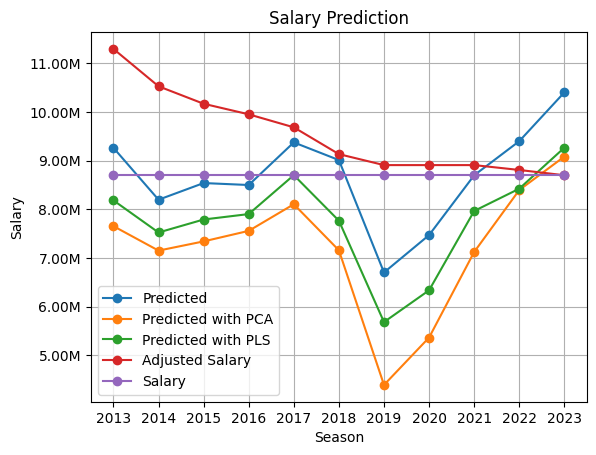

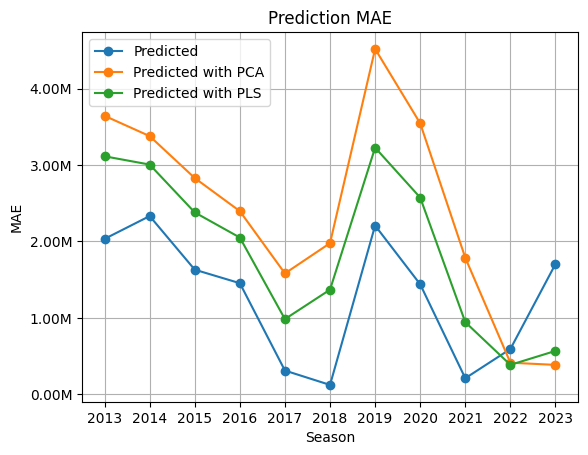

In [25]:
# Use SVM prediction as the base model
salary_evaluation = predictions[2]
salary_evaluation_PCA = predictions_pca[2]
salary_evaluation_PLS = predictions_pls[2]
seasons = player_seasons["season"].astype(str)
adjusted_salary = player_seasons["adjustedSalary"]
salary = player_seasons["salary"]

# Plot the results
plt.plot(seasons, salary_evaluation, label="Predicted", marker="o")
plt.plot(seasons, salary_evaluation_PCA, label="Predicted with PCA", marker="o")
plt.plot(seasons, salary_evaluation_PLS, label="Predicted with PLS", marker="o")
plt.plot(seasons, adjusted_salary, label="Adjusted Salary", marker="o")
plt.plot(seasons, salary, label="Salary", marker="o")
plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
plt.xlabel("Season")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.legend()
plt.grid()
plt.show()

# Plot the error by season
error = salary_evaluation - adjusted_salary
error_PCA = salary_evaluation_PCA - adjusted_salary
error_PLS = salary_evaluation_PLS - adjusted_salary
plt.plot(seasons, error.abs(), label="Predicted", marker="o")
plt.plot(seasons, error_PCA.abs(), label="Predicted with PCA", marker="o")
plt.plot(seasons, error_PLS.abs(), label="Predicted with PLS", marker="o")
plt.gca().yaxis.set_major_formatter(common.get_mformatter(2))
plt.xlabel("Season")
plt.ylabel("MAE")
plt.title("Prediction MAE")
plt.legend()
plt.grid()
plt.show()